In [276]:
import pandas as pd
import csv

In [277]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [278]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [279]:
data.shape

(5572, 5)

# data cleaning

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [281]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [282]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [283]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [284]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [285]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [286]:
data['target']=encoder.fit_transform(data['target'])

In [287]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [288]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [289]:
data.duplicated().sum()

403

In [290]:
data=data.drop_duplicates(keep='first')

In [291]:
data.shape

(5169, 2)

# EDA

In [292]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [293]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff24a9fb7f0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

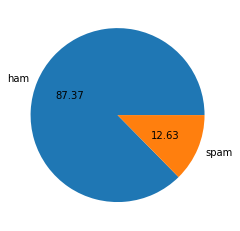

In [294]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [295]:
#data is imbalanced

In [296]:
import nltk

In [297]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samardeepsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [298]:
data['num_char']=data['text'].apply(len) 

/var/folders/29/dhhzjs1d5dg7s36xmsff1qb40000gn/T/ipykernel_22857/2292434789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_char']=data['text'].apply(len)


In [299]:
data.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [300]:
#num of words
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/var/folders/29/dhhzjs1d5dg7s36xmsff1qb40000gn/T/ipykernel_22857/2436363452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [301]:
data['num_sent']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/29/dhhzjs1d5dg7s36xmsff1qb40000gn/T/ipykernel_22857/2001453596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sent']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [302]:
data

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [303]:
data[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [304]:
data[data['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [305]:
data[data['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [306]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

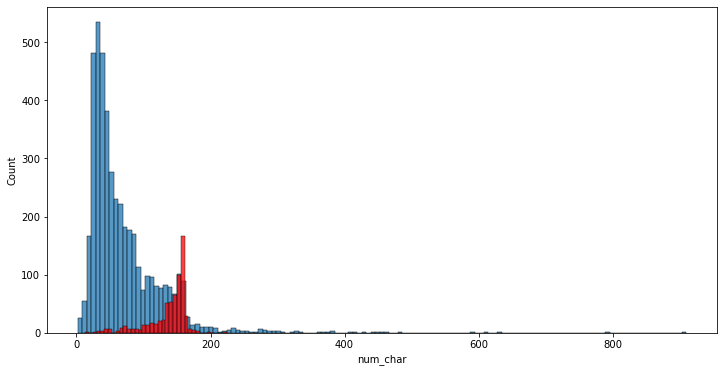

In [307]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_char'])
sns.histplot(data[data['target']==1]['num_char'],color='red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

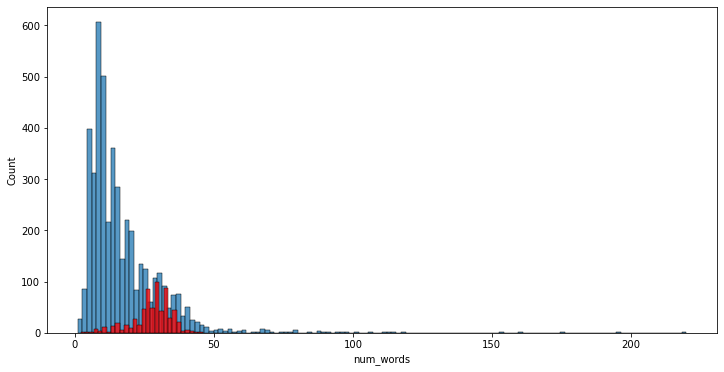

In [308]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

# data preprocessing

In [309]:
from nltk.corpus import stopwords
import string
stops =set(stopwords.words('english'))
punctuations=list(string.punctuation)
stops.update(punctuations) 

In [310]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [342]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stops:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)    

In [312]:
data['ntext'] =data['text'].apply(remove_stopwords)

/var/folders/29/dhhzjs1d5dg7s36xmsff1qb40000gn/T/ipykernel_22857/3943770071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ntext'] =data['text'].apply(remove_stopwords)


In [313]:
import re
def clean_text(text):
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'https?://[^\s\n\r]+', '', text)
    text = re.sub(r'#', '', text)
    return text

In [314]:
data['ntext'] =data['ntext'].apply(clean_text)

/var/folders/29/dhhzjs1d5dg7s36xmsff1qb40000gn/T/ipykernel_22857/2698693666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ntext'] =data['ntext'].apply(clean_text)


In [315]:
from nltk import pos_tag


In [317]:
data['ntext'] =data['ntext'].apply(lambda x:x.lower()) 

/var/folders/29/dhhzjs1d5dg7s36xmsff1qb40000gn/T/ipykernel_22857/2557531945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ntext'] =data['ntext'].apply(lambda x:x.lower())


In [318]:
data['ntext'] =data['ntext'].apply(lambda x:lemmatizer.lemmatize(x))

/var/folders/29/dhhzjs1d5dg7s36xmsff1qb40000gn/T/ipykernel_22857/4274691681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ntext'] =data['ntext'].apply(lambda x:lemmatizer.lemmatize(x))


In [319]:
data

,target,text,num_char,num_words,num_sent,ntext
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i think goes usf, lives around though"
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,this 2nd time tried 2 contact u. u å£750 pound...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,will ì_ b going esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"pity, mood that. so...any suggestions?"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,the guy bitching i acted like i'd interested b...


In [1]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [321]:
spam_wc=wc.generate(data[data['target']==1]['ntext'].str.cat(sep=" "))

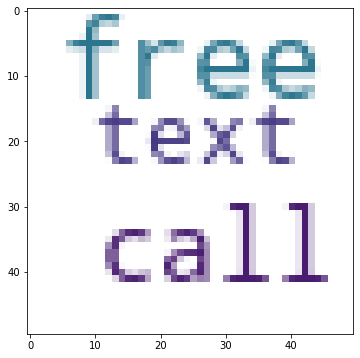

In [322]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [323]:
ham_wc=wc.generate(data[data['target']==0]['ntext'].str.cat(sep=" "))

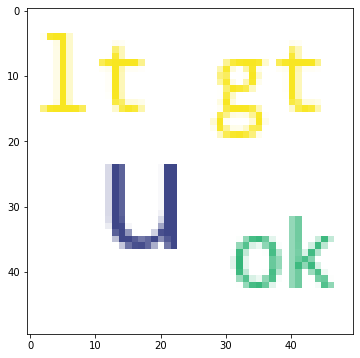

In [324]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [325]:
spam_corpus=[]
for msg in data[data['target']==1]['ntext'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [326]:
spam_corpus

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)t&c's",
 'apply',
 "08452810075over18's",
 'freemsg',
 'hey',
 'darling',
 '3',
 "week's",
 'word',
 'back!',
 "i'd",
 'like',
 'fun',
 'still?',
 'tb',
 'ok!',
 'xxx',
 'std',
 'chgs',
 'send,',
 'å£1.50',
 'rcv',
 'winner!!',
 'as',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'å£900',
 'prize',
 'reward!',
 'to',
 'claim',
 'call',
 '09061701461.',
 'claim',
 'code',
 'kl341.',
 'valid',
 '12',
 'hours',
 'only.',
 'had',
 'mobile',
 '11',
 'months',
 'more?',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free!',
 'call',
 'the',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chances',
 'win',
 'cash!',
 'from',
 '100',
 '20,000',
 'pounds',
 'txt>',
 'csh11',
 'send',
 '87575.',
 'cost',
 '150p/day,',
 '6days,',
 '16+',
 '

In [327]:
len(spam_corpus)

11736

In [328]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 298),
 ('free', 157),
 ('2', 151),
 ('ur', 119),
 ('txt', 114),
 ('text', 96),
 ('u', 96),
 ('mobile', 95),
 ('reply', 93),
 ('claim', 89),
 ('stop', 83),
 ('you', 76),
 ('4', 75),
 ('your', 70),
 ('to', 69),
 ('get', 68),
 ('new', 64),
 ('send', 55),
 ('prize', 53),
 ('nokia', 53),
 ('now!', 53),
 ('contact', 51),
 ('please', 47),
 ('cash', 47),
 ('win', 46),
 ('service', 42),
 ('urgent!', 39),
 ('per', 39),
 ('this', 38),
 ('customer', 33)]

# Model Building

In [329]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [330]:
# x=cv.fit_transform(data['ntext']).toarray()
x=tfidf.fit_transform(data['ntext']).toarray()

In [331]:
x.shape

(5169, 3000)

In [332]:
y=data['target'].values

In [333]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [336]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [337]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [338]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8955512572533849
[[807  89]
 [ 19 119]]
0.5721153846153846


In [339]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[896   0]
 [ 22 116]]
1.0


In [340]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[895   1]
 [ 13 125]]
0.9920634920634921


In [343]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))